In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive/data

 경영과학		   hand
 고양이물리학		   IE414_Assignment2_2021_pub.pdf
'과제06&07.pdf'		   IE414_Chap10_v1-2_s.pdf
'10-1. 반도체란.pdf'	   IE414_Chap10_v3_s.pdf
'12-1. 반도체란.pdf'	   IE414_Chap7_v2_s.pdf
'12. 현미경의 발전.pdf'    images
'13. 물질의 발전.pdf'	   images.txt
 경과2			   ML
'기계 학습_7장_ver1.pdf'  'My Drive'
'기계 학습_8장.pdf'	   실습p10_treeTraversal_n_Queens.ppt
 A.jpg			   실습p11_sumOFsubsets_m_coloring.ppt
 algorithm		   실습p12_BB.ppt
 Allphabet_dataset	   실습p13_sorting.ppt
 Alphabet_dataset	   실습p14_searching1.ppt
 B.jpg			   실습p15_searching2.ppt
 C.jpg			   paper
 Classroom		   pqrs
'Colab Notebooks'	   RealTimeObjectDetection
 data			   testes.jpg
 D.jpg			   testesTP.jpg
 E.jpg			   tt
 FinancialEngineering	   ybm
 F.jpg			   YOLOClassification.ipynb
'제목 없는 문서.gdoc'	   yolov4
 G.jpg


In [7]:
train = pd.read_csv('/mydrive/data/sign_mnist_train.csv')
test = pd.read_csv('/mydrive/data/sign_mnist_test.csv')

#Datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')


In [8]:
#Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Label for the image is:  B


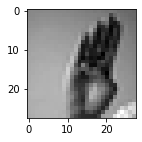

In [9]:
#Sanity check - plot a few images and labels
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray') 
print("Label for the image is: ", class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'Label')

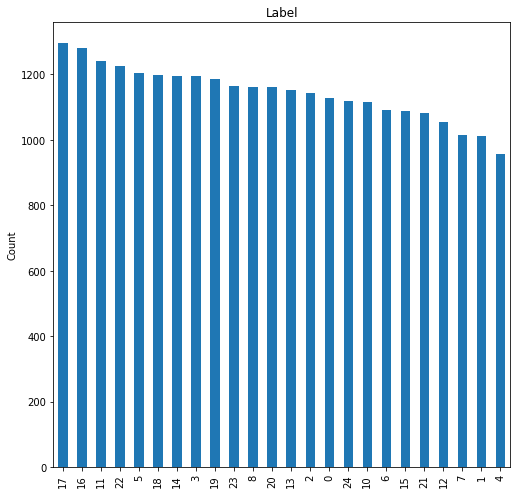

In [10]:
# Data distribution visualization
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [11]:
#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

In [12]:
#Convert y to categorical if planning on using categorical cross entropy
#No need to do this if using sparse categorical cross entropy
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

In [13]:
#Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))


In [14]:
#########################################################

#Model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))

In [15]:
#model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [16]:
#history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))



Epoch 1/10
215/215 [==============================] - 42s 126ms/step - loss: 2.9813 - acc: 0.1039 - val_loss: 1.3604 - val_acc: 0.5224
Epoch 2/10
215/215 [==============================] - 27s 124ms/step - loss: 1.1720 - acc: 0.6011 - val_loss: 0.7054 - val_acc: 0.7507
Epoch 3/10
215/215 [==============================] - 27s 124ms/step - loss: 0.6525 - acc: 0.7795 - val_loss: 0.4407 - val_acc: 0.8409
Epoch 4/10
215/215 [==============================] - 27s 124ms/step - loss: 0.4049 - acc: 0.8610 - val_loss: 0.3355 - val_acc: 0.8653
Epoch 5/10
215/215 [==============================] - 30s 138ms/step - loss: 0.2714 - acc: 0.9073 - val_loss: 0.2616 - val_acc: 0.9062
Epoch 6/10
215/215 [==============================] - 27s 124ms/step - loss: 0.2003 - acc: 0.9310 - val_loss: 0.2407 - val_acc: 0.9156
Epoch 7/10
215/215 [==============================] - 27s 126ms/step - loss: 0.1573 - acc: 0.9479 - val_loss: 0.2013 - val_acc: 0.9336
Epoch 8/10
215/215 [==============================] - 2

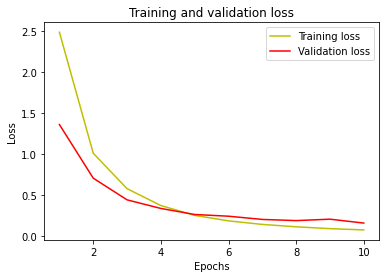

In [17]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

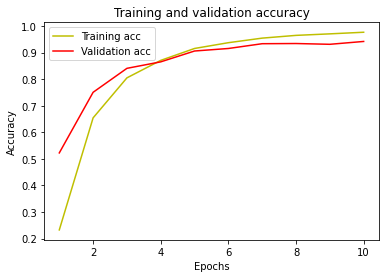

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
import cv2

In [136]:
image = cv2.imread('/mydrive/tt/at.jpg',)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image2 = cv2.imread('/mydrive/tt/bt.jpg')
image3 = cv2.imread('/mydrive/tt/ct.jpg')
image4 = cv2.imread('/mydrive/tt/dt.jpg')
image5 = cv2.imread('/mydrive/tt/et.jpg')
ims = [image,image2,image3,image4,image5]
cqs = [cv2.resize(cv2.cvtColor(elem, cv2.COLOR_BGR2GRAY), (28,28)) for elem in ims]

In [138]:
for elem in cqs:
  print(np.argmax(model.predict(np.reshape(elem,[1,28,28,1])), axis=-1))

[24]
[23]
[24]
[16]
[13]


In [124]:
im1 = cv2.resize(image, (28,28),)
im2 = cv2.resize(image2, (28,28))
im3 = cv2.resize(gray, (28,28))

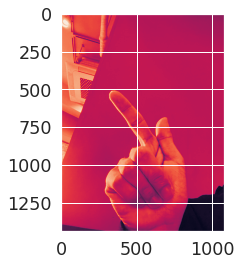

In [125]:
plt.imshow(gray) 

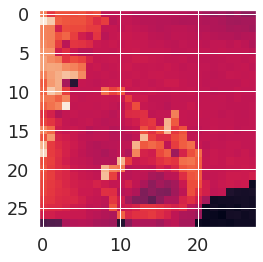

In [126]:
plt.imshow(im3) 

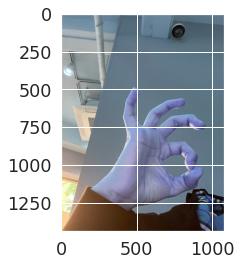

In [113]:
plt.imshow(image2, cmap='gray') 

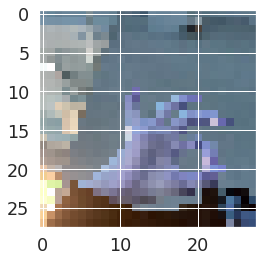

In [114]:
plt.imshow(im2, cmap='gray') 

In [127]:
img = np.reshape(im3,[1,28,28,1])

In [128]:
classes = model.predict(img)

In [129]:
np.argmax(model.predict(img), axis=-1)

array([8])

In [98]:
np.argmax(model.predict([im1]), axis=-1)

ValueError: ignored

In [94]:
np.argmax(model.predict(X_test), axis=-1)[:20]

array([ 6,  5, 10,  0,  3, 21, 10, 14,  3,  7,  8,  8, 21, 12,  7,  4, 22,
        0,  7,  7])

In [92]:
model.predict_classes(X_test)[:20]

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([ 6,  5, 10,  0,  3, 21, 10, 14,  3,  7,  8,  8, 21, 12,  7,  4, 22,
        0,  7,  7])

In [74]:
X_test.dtype

dtype('float32')

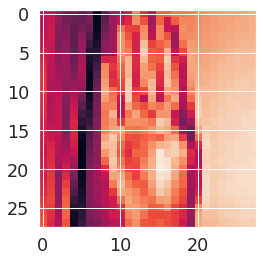

In [70]:
plt.imshow(X_test[245,:,:,0]) 

Accuracy Score =  0.9421360847741216
Predicted Label:  G
True Label:  G


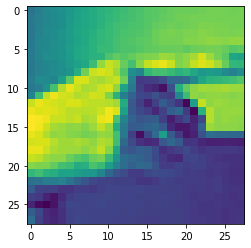

In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score = ', accuracy)

i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(prediction[i])])
print("True Label: ", class_names[int(y_test[i])])

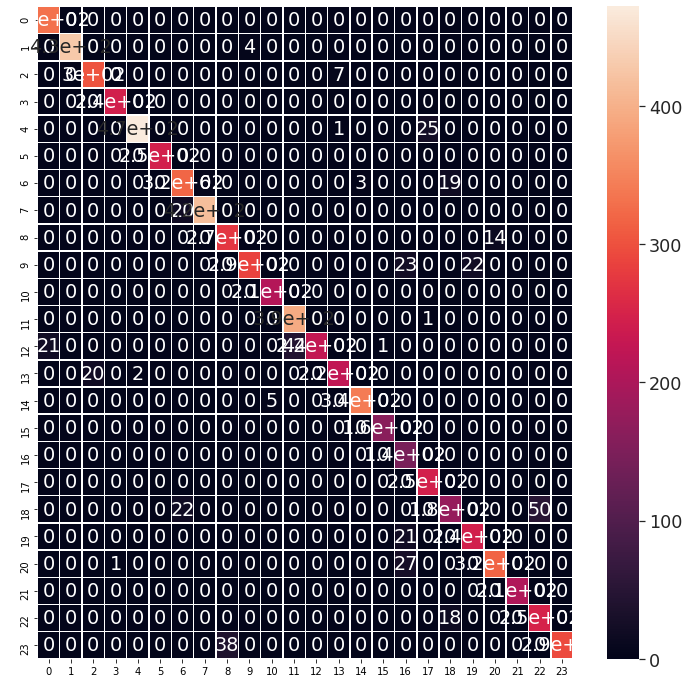

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

([<matplotlib.axis.XTick at 0x7f8ed56f3510>,
 [Text(0, 0, 'A'),
  Text(0, 0, 'B'),
  Text(0, 0, 'C'),
  Text(0, 0, 'D'),
  Text(0, 0, 'E'),
  Text(0, 0, 'F'),
  Text(0, 0, 'G'),
  Text(0, 0, 'H'),
  Text(0, 0, 'I'),
  Text(0, 0, 'J'),
  Text(0, 0, 'K'),
  Text(0, 0, 'L'),
  Text(0, 0, 'M'),
  Text(0, 0, 'N'),
  Text(0, 0, 'O'),
  Text(0, 0, 'P'),
  Text(0, 0, 'Q'),
  Text(0, 0, 'R'),
  Text(0, 0, 'S'),
  Text(0, 0, 'T'),
  Text(0, 0, 'U'),
  Text(0, 0, 'V'),
  Text(0, 0, 'W'),
  Text(0, 0, 'X')])

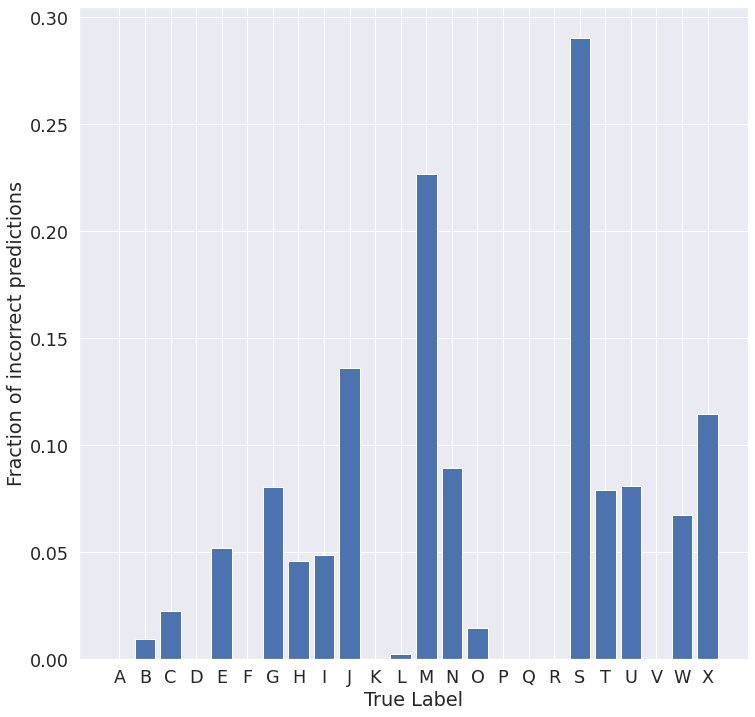

In [22]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(24), class_names) 